# Simulating a dynamical system

In mathematics, a dynamical system is a system in which a function describes the time dependence of a point in a geometrical space. A canonical example of a dynamical system is a system called the [logistic map](https://en.wikipedia.org/wiki/Logistic_map).

1. Define a function called logistic_map that takes two inputs: `x`, representing the state of the system at time `t`, and a parameter `r`. This function should return a value representing the state of the system at time `t+1`.

In [5]:
def logistic_map(x,r):
    return r*x*(1-x)

 2. Using a for loop, iterate the logistic_map function defined in part 1 starting from an initial condition of 0.5 for `t_final`=10, 100, and 1000 periods. Store the intermediate results in a list so that after the for loop terminates you have accumulated a sequence of values representing the state of the logistic map at time `t`=0,1,...,t_final.

In [9]:
t_final = 10
x = 0.5
r = 1
points = []

for t in range(t_final):
    points.append(x)
    x = logistic_map(x,r)
    

In [10]:
points

[0.5,
 0.25,
 0.1875,
 0.15234375,
 0.1291351318359375,
 0.11245924956165254,
 0.09981216674968249,
 0.08984969811841606,
 0.08177672986644556,
 0.07508929631879595]

3. Encapsulate the logic of your for loop into a function called iterate that takes the initial condition as its first input, the parameter `t_final` as its second input and the parameter `r` as its third input. The function should return the list of values representing the state of the logistic map at time t=0,1,...,t_final.

In [11]:
def simulation(x,t_final,r):
    
    points = []

    for t in range(t_final):
        points.append(x)
        x = logistic_map(x,r)

In [17]:
points

[0.5,
 0.25,
 0.1875,
 0.15234375,
 0.1291351318359375,
 0.11245924956165254,
 0.09981216674968249,
 0.08984969811841606,
 0.08177672986644556,
 0.07508929631879595]

# Importance of the initial condition `r`
- With r between 0 and 1, the population will eventually die, independent of the initial population.
- With r between 1 and 2, the population will quickly approach the value r − 1/r, independent of the initial population.
- With r between 2 and 3, the population will also eventually approach the same value r − 1/r, but first will fluctuate around that value for some time. The rate of convergence is linear, except for r = 3, when it is dramatically slow, less than linear (see Bifurcation memory).
- With r between 3 and 1 + √6 ≈ 3.44949 the population will approach permanent oscillations between two values. 
- With r between 3.44949 and 3.54409 (approximately), from almost all initial conditions the population will approach permanent oscillations among four values. The latter number is a root of a 12th degree polynomial.
- With r increasing beyond 3.54409, from almost all initial conditions the population will approach oscillations among 8 values, then 16, 32, etc. 
- At r ≈ 3.56995 is the onset of chaos, at the end of the period-doubling cascade. From almost all initial conditions, we no longer see oscillations of finite period. Slight variations in the initial population yield dramatically different results over time, a prime characteristic of chaos.
- Most values of r beyond 3.56995 exhibit chaotic behaviour, but there are still certain isolated ranges of r that show non-chaotic behavior; these are sometimes called islands of stability. For instance, beginning at 1 + √8 (approximately 3.82843) there is a range of parameters r that show oscillation among three values, and for slightly higher values of r oscillation among 6 values, then 12 etc.
- Beyond r = 4, almost all initial values eventually leave the interval [0,1] and diverge.

In [50]:
import matplotlib.pyplot as plt

def simulation(x,t_final,r,plot=True):
    
    points = []

    for t in range(t_final):
        points.append(x)
        x = logistic_map(x,r)
        
    if plot is True:
        plt.plot(range(t_final),points,marker='x')
    else:
        return points

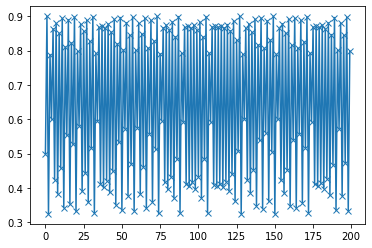

In [51]:
simulation(0.5,200,3.6)

# Visualising the Logistic map

Text(0.5, 0, 'x_(t+2)')

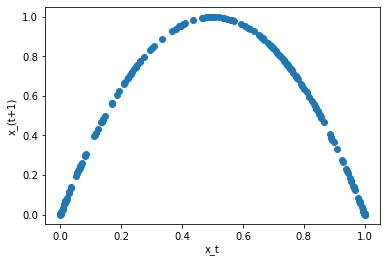

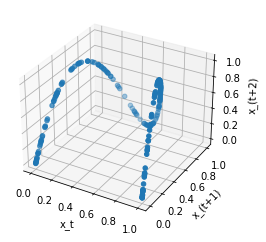

In [76]:
points = simulation(0.749,200,4.0,plot=False)
plt.scatter(points[:-1],points[1:])
plt.xlabel("x_t")
plt.ylabel("x_(t+1)")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:-2],points[1:-1],points[2:])
ax.set_xlabel("x_t")
ax.set_ylabel("x_(t+1)")
ax.set_zlabel("x_(t+2)")

# Bifurcation diagram to show the regions of chaos and order

Now we are only interested in the final value after a given number of time steps, for various initial values of x.

Text(0, 0.5, 'x_init')

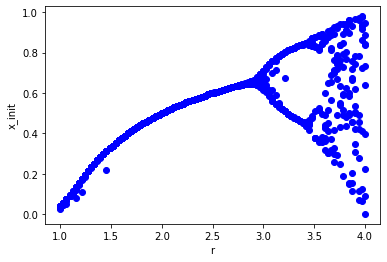

In [88]:
import numpy as np

for r in np.linspace(1,4,100):
    for x_init in np.random.random(10):
        points = simulation(x_init,20,r,plot=False)
        plt.scatter(r,points[-1],color='b')
plt.xlabel("r")
plt.ylabel("x_init")